In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chapter 12

## Problem 12.8

In [2]:
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 12.8.(a)

In [3]:
df = get_rdataset('USArrests').data
df.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
scaler = StandardScaler(with_std=True, with_mean=True)
df = scaler.fit_transform(df)
print("Explained variance ratio via PCA:")
pca = PCA()
pca.fit(df)
print(pca.explained_variance_ratio_)

Explained variance ratio via PCA:
[0.62006039 0.24744129 0.0891408  0.04335752]


### 12.8.(b)

In [5]:
print(f"Loadings: {(loadings:=pca.components_)}")

Loadings: [[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


In [6]:
e_var = ((df @ loadings.T)**2).sum(0)
t_var = (df ** 2).sum()
print(f"total variance: {t_var}")
print(f"explained variances: {e_var}")
print(f"PVE: {e_var / t_var}")

total variance: 200.0
explained variances: [124.01207896  49.48825763  17.82815903   8.67150439]
PVE: [0.62006039 0.24744129 0.0891408  0.04335752]


## Problem 12.9

### 12.9.(a)

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
from ISLP.cluster import compute_linkage

Complete linkage


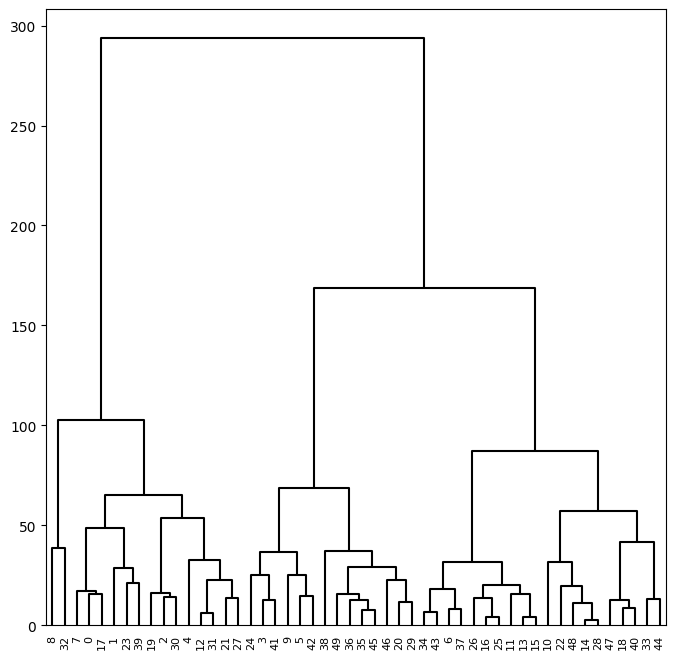

In [8]:
model = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage='complete'
)
df = get_rdataset('USArrests').data
model.fit(df)
print("Complete linkage")
cargs = {'color_threshold':-np.inf ,'above_threshold_color':'black'}
linkage_comp = compute_linkage(model);
fig , ax = plt.subplots (1, 1, figsize =(8, 8));
dendrogram(linkage_comp, ax=ax, **cargs);

### 12.9.(b)

In [9]:
cluster = cut_tree(linkage_comp, n_clusters = 3).squeeze()
print(f"cluster index: {cluster}")

cluster index: [0 0 0 1 0 1 2 0 0 1 2 2 0 2 2 2 2 0 2 0 1 0 2 0 1 2 2 0 2 1 0 0 0 2 2 1 1
 2 1 0 2 1 1 2 2 1 1 2 2 1]


In [10]:
print("Cluster 0")
df.iloc[cluster==0]

Cluster 0


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
California,9.0,276,91,40.6
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Illinois,10.4,249,83,24.0
Louisiana,15.4,249,66,22.2
Maryland,11.3,300,67,27.8


In [11]:
print("Cluster 1")
df.iloc[cluster==1]

Cluster 1


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Arkansas,8.8,190,50,19.5
Colorado,7.9,204,78,38.7
Georgia,17.4,211,60,25.8
Massachusetts,4.4,149,85,16.3
Missouri,9.0,178,70,28.2
New Jersey,7.4,159,89,18.8
Oklahoma,6.6,151,68,20.0
Oregon,4.9,159,67,29.3
Rhode Island,3.4,174,87,8.3


In [12]:
print("Cluster 2")
df.iloc[cluster==2]

Cluster 2


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Connecticut,3.3,110,77,11.1
Hawaii,5.3,46,83,20.2
Idaho,2.6,120,54,14.2
Indiana,7.2,113,65,21.0
Iowa,2.2,56,57,11.3
Kansas,6.0,115,66,18.0
Kentucky,9.7,109,52,16.3
Maine,2.1,83,51,7.8
Minnesota,2.7,72,66,14.9


In [13]:
print("""
      Those 3 clusters seem to be clusted by the frequency of Assault. (thresholds: 120, 210)
      """)


      Those 3 clusters seem to be clusted by the frequency of Assault. (thresholds: 120, 210)
      


### 12.9.(c)

Complete linkage after scaling


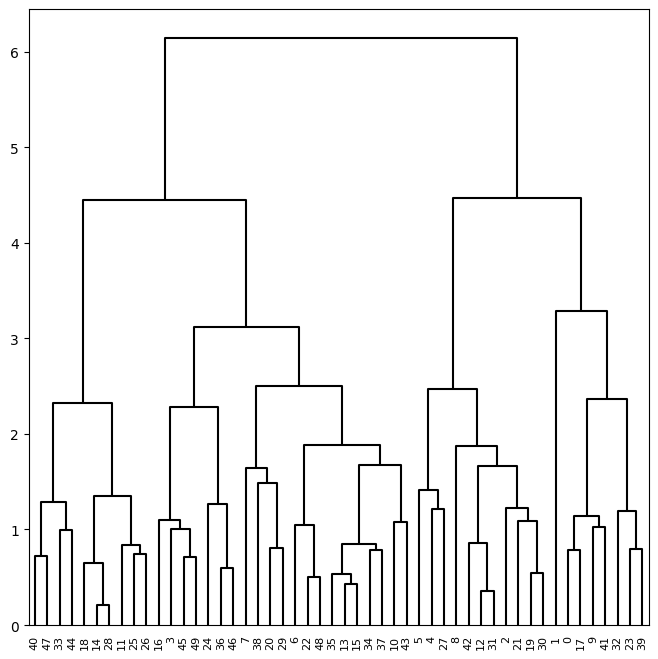

In [14]:
df = scaler.fit_transform(df)
model.fit(df)
print("Complete linkage after scaling")
cargs = {'color_threshold':-np.inf ,'above_threshold_color':'black'}
linkage_comp = compute_linkage(model);
fig , ax = plt.subplots (1, 1, figsize =(8, 8));
dendrogram(linkage_comp, ax=ax, **cargs);

In [15]:
cluster = cut_tree(linkage_comp, n_clusters=5).squeeze()
print(f"cluster index: {cluster}")

cluster index: [0 1 2 3 2 2 3 3 2 0 3 4 2 3 4 3 3 0 4 2 3 2 3 0 3 4 4 2 4 3 2 2 0 4 3 3 3
 3 3 0 4 0 2 3 4 3 3 4 3 3]


### 12.9.(d)

In [16]:
print(f"""
    cluster0: \n
        {df[cluster==0].mean(0)},
    cluster1: \n
        {df[cluster==1].mean(0)},
    cluster2: \n
        {df[cluster==2].mean(0)},
    cluster3: \n
        {df[cluster==3].mean(0)},
    cluster4: \n
        {df[cluster==4].mean(0)},
    """)


    cluster0: 

        [ 1.59644066  0.97606837 -0.78540457  0.0489325 ],
    cluster1: 

        [ 0.51301858  1.11805959 -1.22406668  2.50942392],
    cluster2: 

        [0.75759426 1.13128272 0.94567938 1.22798509],
    cluster3: 

        [-0.44450124 -0.43980335  0.36442187 -0.28591208],
    cluster4: 

        [-1.0687114  -1.11587777 -1.13334338 -1.03556337],
    


## Problem 12.13

### 12.13.(a)

In [17]:
df_gen = pd.read_csv("Ch12Ex13.csv", header=None).T
df_gen.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


### 12.13.(b)

In [18]:
corD = 1 - np.corrcoef(df_gen)
model = AgglomerativeClustering(
    linkage='complete', distance_threshold=0, n_clusters=None, metric='precomputed'
    )
model.fit(corD)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='precomputed', n_clusters=None)

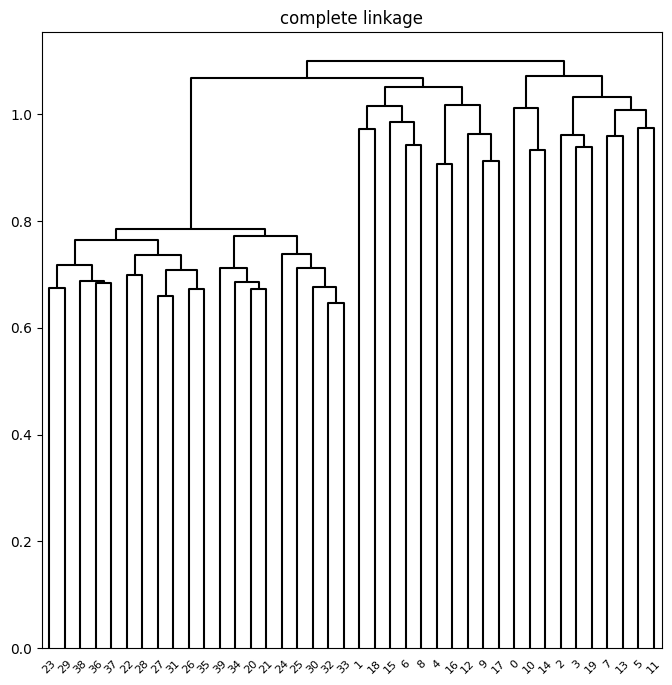

In [19]:
linkage_cor = compute_linkage(model)
fig , ax = plt.subplots(figsize =(8, 8))
dendrogram(linkage_cor , ax=ax , ** cargs)
ax.set_title("complete linkage");

In [20]:
model = AgglomerativeClustering(
    linkage='single', distance_threshold=0, n_clusters=None, metric='precomputed'
    )
model.fit(corD)

AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

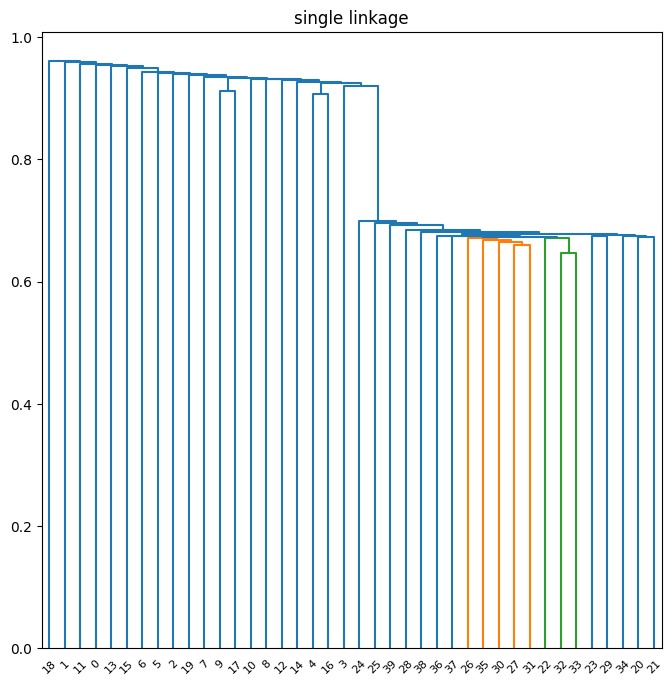

In [21]:
linkage_cor = compute_linkage(model)
fig , ax = plt.subplots (figsize =(8, 8))
dendrogram(linkage_cor, ax=ax)
ax.set_title("single linkage");

In [22]:
model = AgglomerativeClustering(
    linkage='average', distance_threshold=0, n_clusters=None, metric='precomputed'
    )
model.fit(corD)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        metric='precomputed', n_clusters=None)

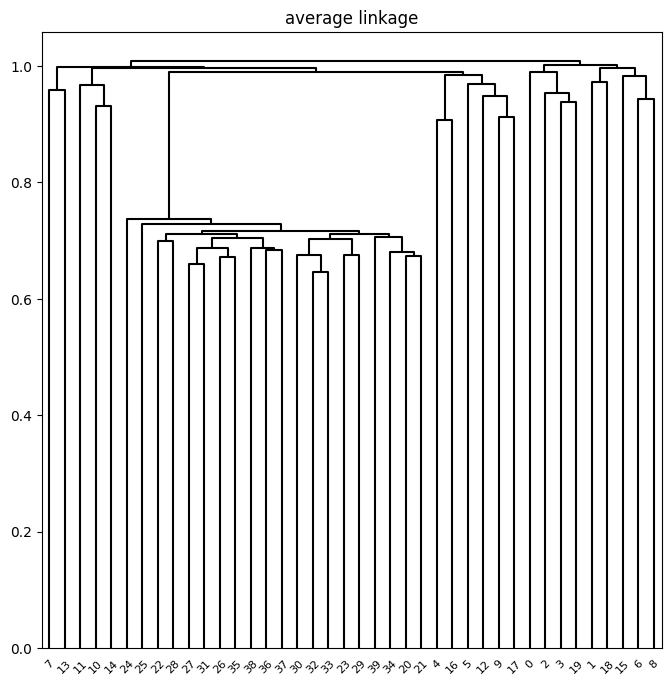

In [23]:
linkage_cor = compute_linkage(model)
fig , ax = plt.subplots (1, 1, figsize =(8, 8))
dendrogram(linkage_cor , ax=ax , ** cargs)
ax.set_title("average linkage");

### 12.13.(c)

In [24]:
print(f"""
      Let's think about the first principal component direction.
      """)


      Let's think about the first principal component direction.
      


In [25]:
scaler = StandardScaler(with_std=True, with_mean=True)
df_gen_scaled = scaler.fit_transform(df_gen)

pca = PCA()
pca.fit(df_gen_scaled)

print(f"""
      The first principal component explains {pca.explained_variance_ratio_[0]} of total variance.
      That direction is a linear combination of 1000 genes,
      so the largest contributing gene may be a suggestion: {np.abs(pca.components_[0]).argmax()}
      """)


      The first principal component explains 0.08108273167635424 of total variance.
      That direction is a linear combination of 1000 genes,
      so the largest contributing gene may be a suggestion: 501
      


# Chapter 13

## 1.

### (a) $\textcolor{red}{+3}$

If we assume the independence, the number of type I errors follows $B(m, \alpha)$ distribution.
So we expect $m\alpha$ rejections on average.

### (b) $\textcolor{red}{+2}$

Family wise error rate is defined by the probability of at least one rejection happens.
In other words, $1 - (1-\alpha)^m$.

### (c) $\textcolor{red}{+3}$

Since there are only two hypotheses, FWER $= 1-P(p_1 < \alpha \cap p_2 < \alpha )$.
By positive correlation, we have $P(p_1 < \alpha \cap p_2 < \alpha) > P(p_1 < \alpha) \times P(p_2 < \alpha)$.
Therefore we have FWER $< 1-P(p_1<\alpha)P(p_2 <\alpha)$.

### (d) $\textcolor{red}{+2}$

Negative correlation reverses the inequalities.

## 2.

### (a)

$P(A_j = 1) = \alpha$ by the definition. So each $A_j$ follows Bernoulli distribution with $\alpha$.

### (b)

Sum of $m$ Bernoulli trials is equal (in distribution) to Binomial $(m, \alpha)$.

### (c)

Variance is well known to be $m\alpha (1-\alpha)$.

## 4.

### (a)

Hypotheses of which $p$-values are below $0.05$ will be rejected.

### (b)

Assume that we control each hypothesis at level $x$.
Then FWER $= 1- (1-x)^{10} < 0.05$.
By solving the inequality, we have $x < 0.0051$.
Hypotheses of which $p$-values are below $x$ will be rejected.

### (c)

$\frac{q \times j}{10} = 0.005j$.
So $L = 5$.
Five hypotheses of smallest p-values are rejected.

### (d)

Threshold is $0.02j$, so $L = 8$.

### (e)

Recall the definition of FDR.
It is the (expected) ratio of false positives and all positives.
Thus $8 \times 0.2 = 1.6$ type I errors are expected.

## 5.

### (a), (b), (c), (d) : skipped.

### (e)

Since it becomes harder to reject null hypotheses, the number of positive will decrease.
However, we can be more confident to rejections.

In [26]:
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests as mult_test

## Problem 13.8

### 13.8.(a)

In [27]:
rng = np.random.default_rng(1)
X = rng.normal(size = (20, 100))
result = ttest_1samp(X,0)
df_result = pd.DataFrame(result.pvalue, columns = ['pvalue'])
print("100 one sample t-test p-values")
print(df_result)

100 one sample t-test p-values
      pvalue
0   0.053880
1   0.202573
2   0.856777
3   0.619587
4   0.466054
..       ...
95  0.121857
96  0.325343
97  0.130220
98  0.437973
99  0.896249

[100 rows x 1 columns]


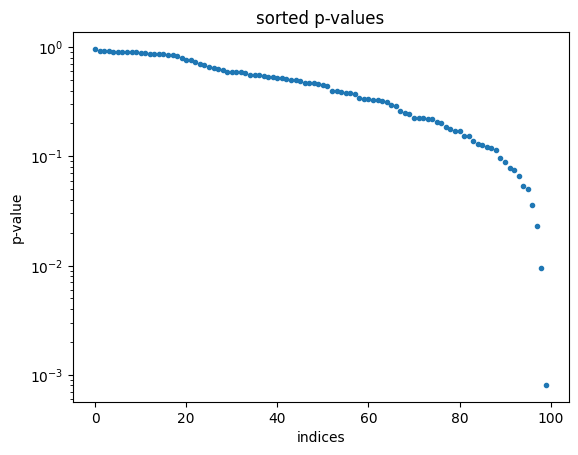

In [28]:
df_result_sorted = df_result.sort_values(by='pvalue', ascending=False) 
pvalues = df_result_sorted.values
order = df_result_sorted.index
plt.semilogy(pvalues, '.')
plt.xlabel("indices")
plt.ylabel("p-value")
plt.title("sorted p-values")
plt.show()

### 13.8.(b)

In [29]:
df_result_sorted['reject'] = df_result_sorted <= 0.05
print(df_result_sorted)

      pvalue  reject
66  0.962541   False
18  0.917116   False
12  0.916143   False
73  0.911793   False
32  0.909169   False
..       ...     ...
72  0.050266   False
27  0.035539    True
39  0.022933    True
44  0.009551    True
14  0.000807    True

[100 rows x 2 columns]


In [30]:
print(f"""
      How many rejections?: {df_result_sorted["reject"].sum()}.
      """)


      How many rejections?: 4.
      


### 13.8.(c)

In [31]:
print(f"""
      We use the Bonferroni's method.
      Then size for individual test should be 0.05/100 =  0.0005.
      However, as shown in the previous answer, the smallest pvalue is 0.0008 > 0.0005.
      Therefore nothing is rejected.
      """)


      We use the Bonferroni's method.
      Then size for individual test should be 0.05/100 =  0.0005.
      However, as shown in the previous answer, the smallest pvalue is 0.0008 > 0.0005.
      Therefore nothing is rejected.
      


### 13.8.(d)

In [32]:
conclusions, *_ = mult_test(result.pvalue, method = "fdr_bh")
print(f"""
      How many rejections?: {conclusions.sum()}.
      """)


      How many rejections?: 0.
      


### 13.8.(e) $\textcolor{red}{+6}$

In [33]:
print(f"small p-values -> did well")
indices = order[-10:]
picked = pvalues[-10:].squeeze()
conclusions, *_ = mult_test(picked, method = "fdr_bh")
print(f"""
      How many rejections?: {conclusions.sum()}.
      """)

small p-values -> did well

      How many rejections?: 2.
      


### 13.8.(f) $\textcolor{red}{+4}$

It is the same to this: discarding observations of $x_i > 1$ when we are conducting a test $E[x] <1$.